In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

Final structure of the dataset:
              Data Type
carat           float64
cut      string[python]
color    string[python]
clarity  string[python]
depth           float64
table           float64
price             int64
x               float64
y               float64
z               float64


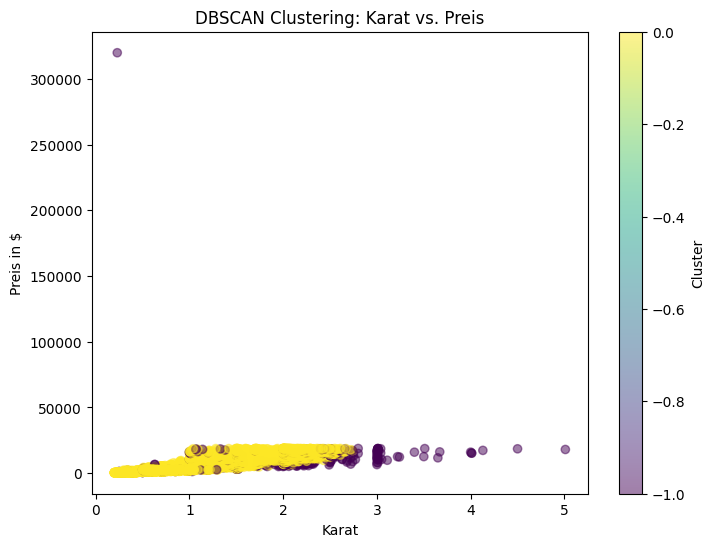

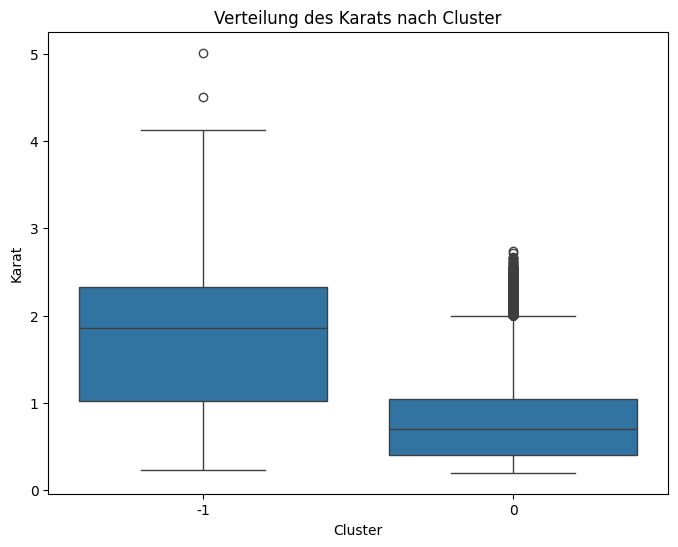

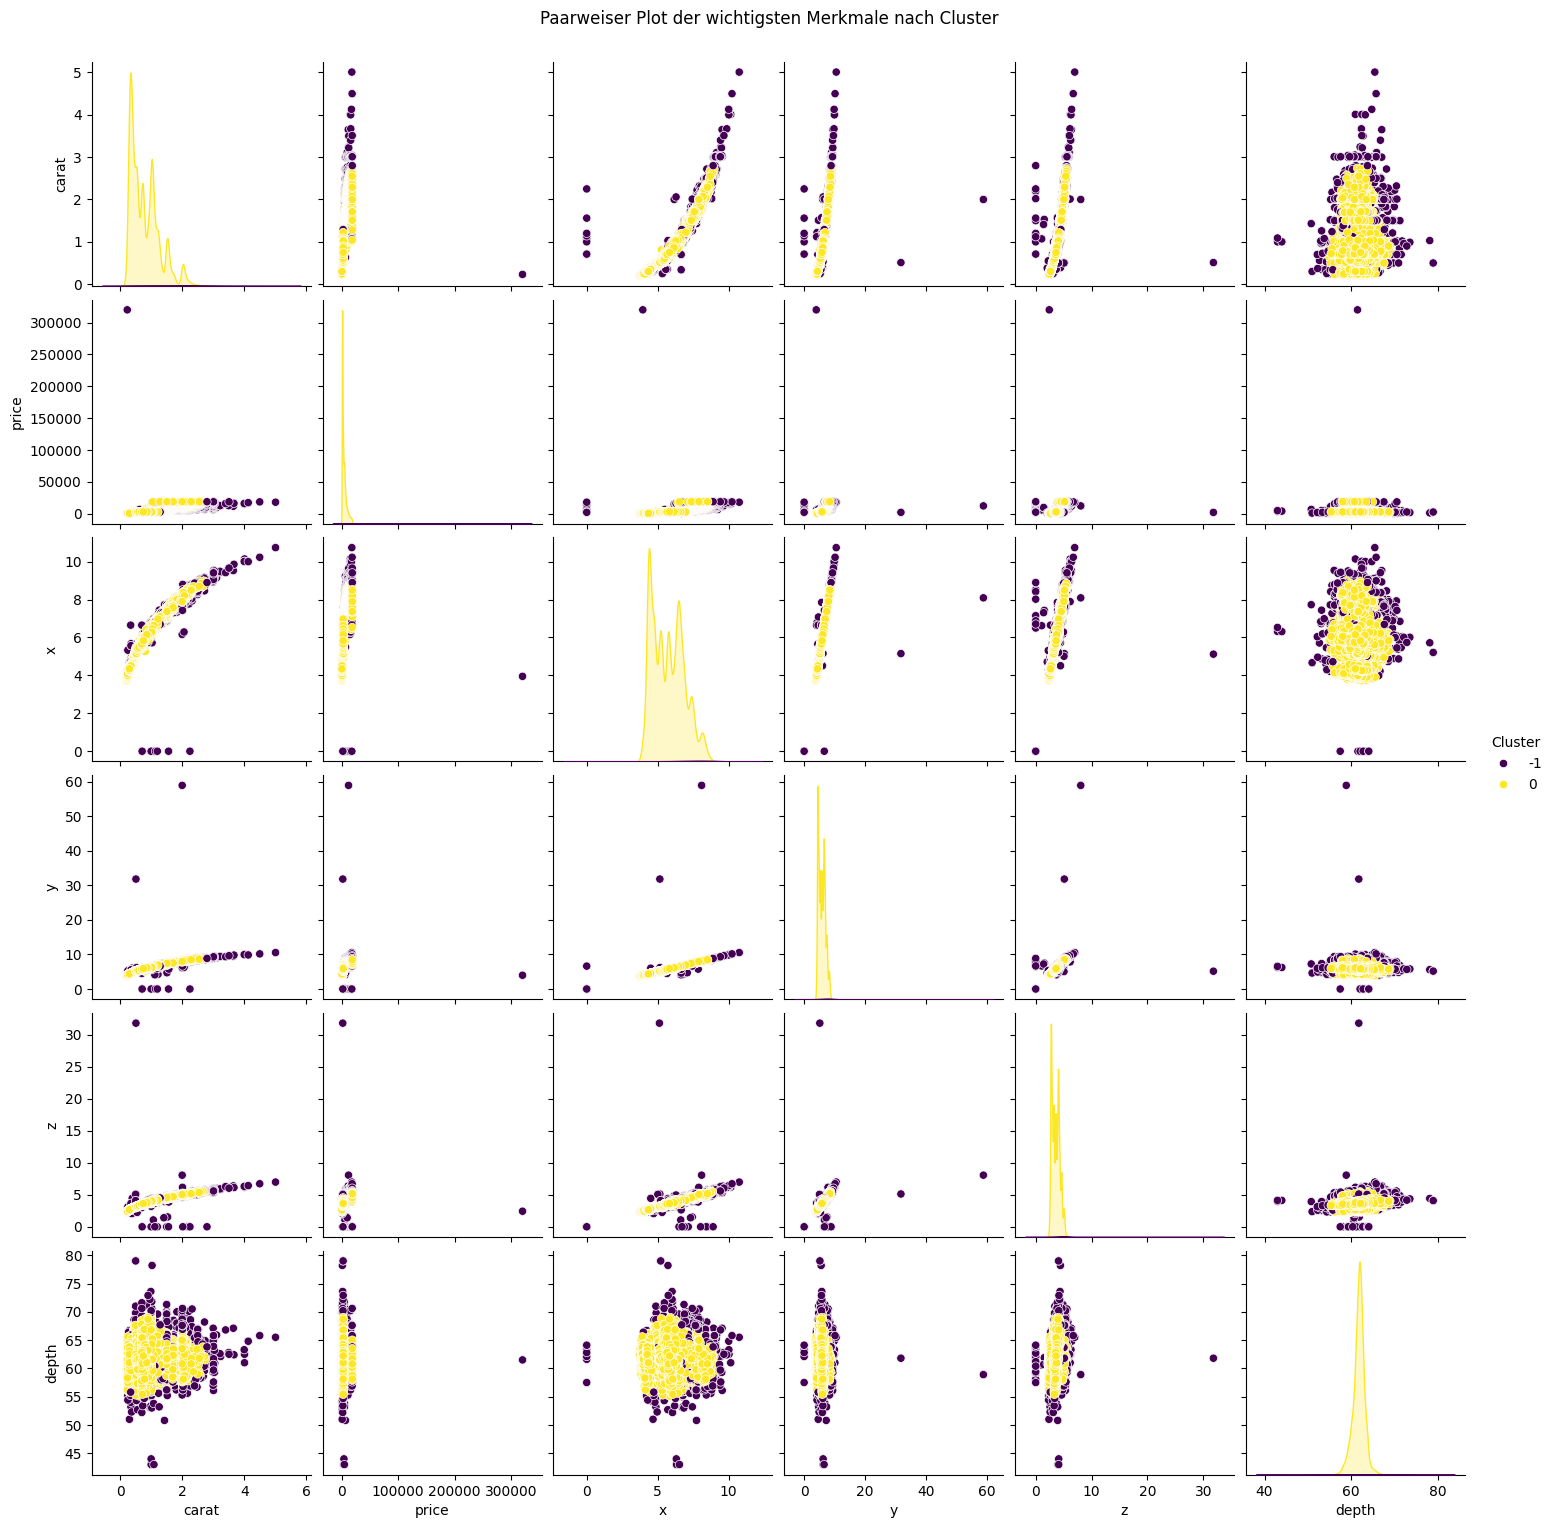

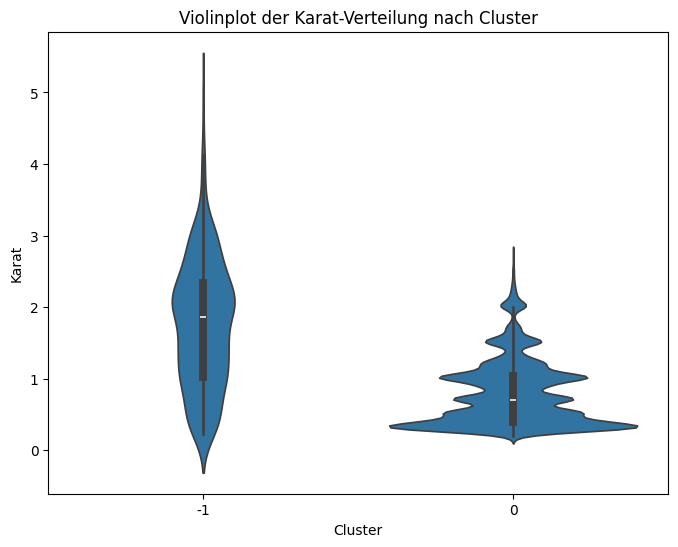

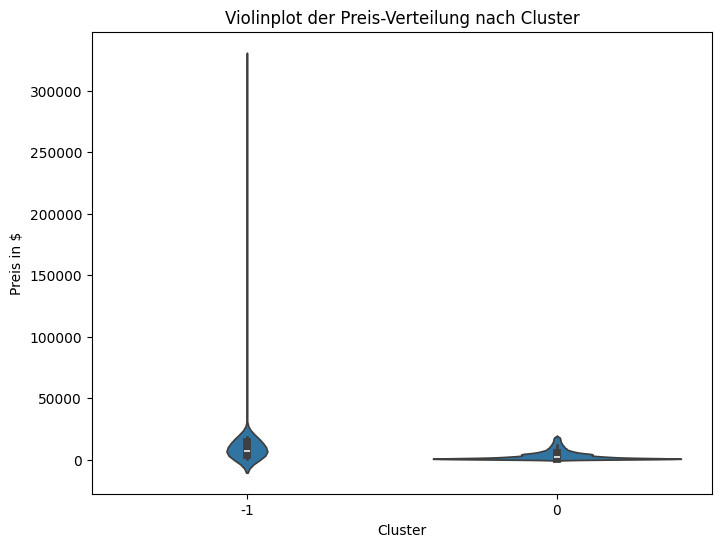

In [ ]:
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

# Kategorische Features für das One-Hot-Encoding
categorical_features = ['cut', 'color', 'clarity']

from sklearn.preprocessing import OneHotEncoder

# One-Hot-Encoding anwenden
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output=False statt sparse=False
encoded_cats = encoder.fit_transform(df[categorical_features])

# Umwandeln der kodierten Daten in einen DataFrame
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

display(encoded_df.head())

# Kombinieren des ursprünglichen DataFrames mit den kodierten Werten
df_encoded = pd.concat([df, encoded_df], axis=1)

# Entfernen der ursprünglichen kategorischen Spalten
df_encoded.drop(columns=categorical_features, inplace=True)

# Wichtige numerische Features für das Clustering
features = ['carat', 'price', 'x', 'y', 'z', 'depth']  # 'cut', 'color', 'clarity' sind bereits kodiert
X = df_encoded[features]

# Skalierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN anwenden (Parameter kannst du anpassen)
dbscan = DBSCAN(eps=0.5, min_samples=10)  # eps bestimmt die Clustergröße
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Scatterplot der Cluster (nur Carat und Preis als Beispiel)
plt.figure(figsize=(8,6))
plt.scatter(df['carat'], df['price'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Karat")
plt.ylabel("Preis in $")
plt.title("DBSCAN Clustering: Karat vs. Preis")
plt.colorbar(label="Cluster")
plt.show()

# Boxplot für die Verteilung von 'carat' nach Cluster
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Cluster'], y=df['carat'])
plt.xlabel("Cluster")
plt.ylabel("Karat")
plt.title("Verteilung des Karats nach Cluster")
plt.show()

# Paarweise Plot (Pairplot) für eine bessere Übersicht der Cluster mit mehreren Variablen
sns.pairplot(df[['carat', 'price', 'x', 'y', 'z', 'depth', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle("Paarweiser Plot der wichtigsten Merkmale nach Cluster", y=1.02)
plt.show()

# Violinplot für die Verteilung der Diamantenmerkmale innerhalb der Cluster
plt.figure(figsize=(8,6))
sns.violinplot(x=df['Cluster'], y=df['carat'])
plt.xlabel("Cluster")
plt.ylabel("Karat")
plt.title("Violinplot der Karat-Verteilung nach Cluster")
plt.show()

plt.figure(figsize=(8,6))
sns.violinplot(x=df['Cluster'], y=df['price'])
plt.xlabel("Cluster")
plt.ylabel("Preis in $")
plt.title("Violinplot der Preis-Verteilung nach Cluster")
plt.show()